In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix 
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime

# Linear regression

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MLproject/DRREDDY.csv')
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1827.672814,1830.099821,1855.226715,1803.185488,1828.279693,1828.382689,1829.621266,4.409815e+05,1.045022e+14,37121.187296,2.174943e+05,0.523664
std,1092.984492,1095.534718,1106.531082,1082.903924,1093.978015,1093.927165,1094.668053,6.060398e+05,2.719076e+14,39213.885661,1.871552e+05,0.165854
min,374.000000,365.650000,384.950000,355.250000,375.150000,374.000000,372.550000,7.070000e+02,4.333085e+10,450.000000,7.070000e+02,0.036800
25%,906.175000,908.175000,923.175000,897.000000,906.125000,906.175000,907.810000,1.669668e+05,1.787360e+13,17731.000000,9.731900e+04,0.411500
50%,1538.825000,1539.500000,1565.375000,1511.125000,1539.000000,1539.400000,1540.465000,2.959825e+05,4.506694e+13,27115.000000,1.692400e+05,0.539100
75%,2609.337500,2612.000000,2641.500000,2582.900000,2609.812500,2609.625000,2608.522500,5.271700e+05,1.020985e+14,43138.750000,2.769510e+05,0.644200
max,5416.800000,5440.950000,5512.650000,5329.450000,5413.000000,5416.800000,5396.870000,2.198715e+07,1.157853e+16,929801.000000,2.065429e+06,1.000000


In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close','Open','High','Volume'])

new_data['Date'] = df['Date'].values
new_data['Close'] = df['Close'].values
new_data['Open'] = df['Open'].values
new_data['High'] = df['High'].values
new_data['Volume'] = df['Volume'].values

In [ ]:
new_data

,Date,Close,Open,High,Volume
0,2000-01-03,1508.25,1505.00,1508.25,13280
1,2000-01-04,1628.95,1590.00,1628.95,57142
2,2000-01-05,1568.05,1549.00,1650.00,119697
3,2000-01-06,1661.55,1599.00,1693.50,121966
4,2000-01-07,1529.10,1685.00,1685.00,79641
...,...,...,...,...,...
5301,2021-04-26,5066.70,5125.00,5130.00,950577
5302,2021-04-27,5057.25,5090.50,5116.00,957835
5303,2021-04-28,5044.45,5082.55,5106.90,843953
5304,2021-04-29,5102.30,5070.25,5144.00,1071931


In [ ]:
import fastai

In [ ]:
from fastai.tabular import add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


In [ ]:
new_data

,Close,Open,High,Volume,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,1508.25,1505.00,1508.25,13280,2000,1,1,3,0,3,False,False,False,False,False,False
1,1628.95,1590.00,1628.95,57142,2000,1,1,4,1,4,False,False,False,False,False,False
2,1568.05,1549.00,1650.00,119697,2000,1,1,5,2,5,False,False,False,False,False,False
3,1661.55,1599.00,1693.50,121966,2000,1,1,6,3,6,False,False,False,False,False,False
4,1529.10,1685.00,1685.00,79641,2000,1,1,7,4,7,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,5066.70,5125.00,5130.00,950577,2021,4,17,26,0,116,False,False,False,False,False,False
5302,5057.25,5090.50,5116.00,957835,2021,4,17,27,1,117,False,False,False,False,False,False
5303,5044.45,5082.55,5106.90,843953,2021,4,17,28,2,118,False,False,False,False,False,False
5304,5102.30,5070.25,5144.00,1071931,2021,4,17,29,3,119,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scal = scaler.fit_transform(new_data)

In [ ]:
train = new_data[:3714]
valid = new_data[3714:]

pred = ['Close','High']
x_train = train.drop(pred, axis=1)
y_train = train[pred]
x_valid = valid.drop(pred, axis=1)
y_valid = valid[pred]


#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
preds = model.predict(x_valid)
print('Variance score: %.2f' % model.score(x_valid, y_valid))
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print("rms : %.2f" %rms)

Variance score: 1.00
rms : 48.47


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [ ]:
y_valid['Close']

3714    3573.20
3715    3575.25
3716    3610.90
3717    3606.25
3718    3628.45
         ...   
5301    5066.70
5302    5057.25
5303    5044.45
5304    5102.30
5305    5163.10
Name: Close, Length: 1592, dtype: float64

Text(0, 0.5, 'Predicted Price close')

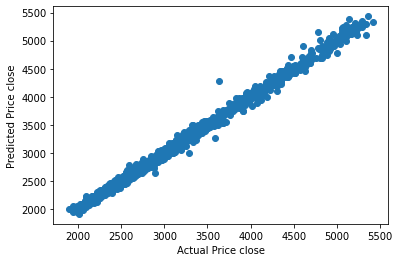

In [ ]:
x = np.array(y_valid['Close'])
y = np.array([x[0] for x in preds])
plt.scatter(x, y)
plt.xlabel("Actual Price close")
plt.ylabel("Predicted Price close")

Text(0, 0.5, 'Predicted Price High')

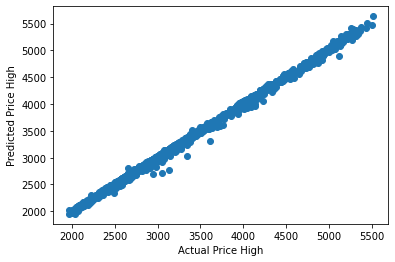

In [ ]:
x = np.array(y_valid['High'])
y = np.array([x[1] for x in preds])
plt.scatter(x, y)
plt.xlabel("Actual Price High")
plt.ylabel("Predicted Price High")

In [ ]:
b=np.transpose(preds)

In [ ]:
preds

array([[3517.722044, 3563.201092],
       [3577.418523, 3621.802486],
       [3563.050511, 3607.35831 ],
       [3617.980394, 3662.064813],
       ...,
       [5088.903304, 5161.295993],
       [5080.756851, 5150.775171],
       [5069.954697, 5142.535602],
       [5141.202538, 5220.021219]])

In [ ]:
b

array([[3517.722044, 3577.418523, 3563.050511, 3617.980394, ..., 5088.903304, 5080.756851, 5069.954697, 5141.202538],
       [3563.201092, 3621.802486, 3607.35831 , 3662.064813, ..., 5161.295993, 5150.775171, 5142.535602, 5220.021219]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
No handles with labels found to put in legend.


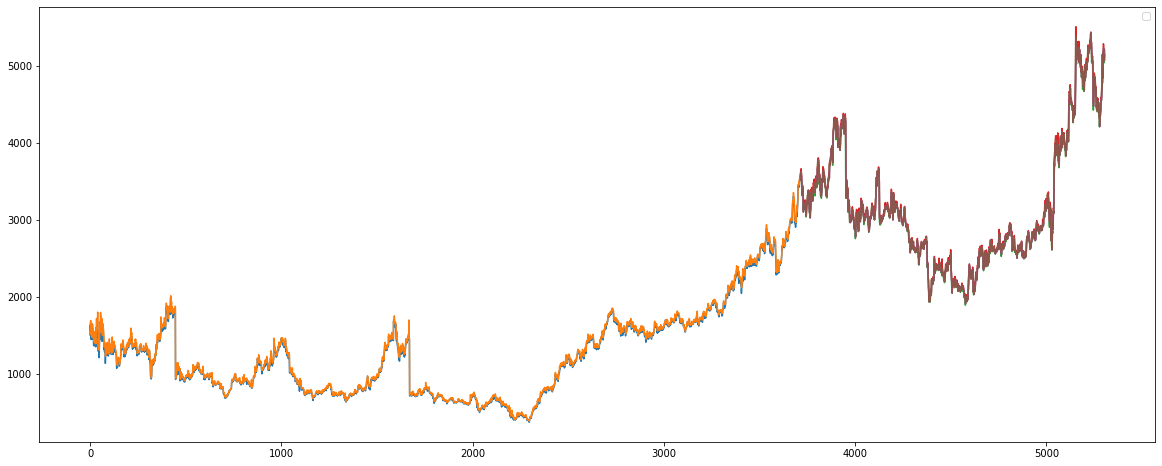

In [ ]:
valid['Predictions close'] = [x[0] for x in preds]
valid['Predictions high'] = [x[1] for x in preds]

valid.index = new_data[3714:].index
train.index = new_data[:3714].index

fig = plt.figure(figsize =(20,8))
plt.plot(train[pred])
plt.plot(valid[['Close','High', 'Predictions close', 'Predictions close']])
plt.legend()

In [ ]:
predsss = ['Predictions close', 'Predictions high' ]
y2 = valid[predsss].mean()
x2 = valid[pred].mean()

In [ ]:
x2[0]/y2[0] * 100

99.87952884708274

In [ ]:
acc = x2/y2*100

Close               NaN
High                NaN
Predictions close   NaN
Predictions high    NaN
dtype: float64

In [ ]:
from sklearn.metrics import classification_report